Goal: Learn how to use the basic regression capabilities of R to create an exponential model of reps completed as a function of weight lifted to momentary muscle failure.                                                                            

Extension: The next stage is to use this method to create a simple function that take user input of actual test weights and reps to produce an individualized curve. Potentially this can be further extended to include the variables of bodyweight and age to make a predictive calculator that produces a curve based on a 1RM test weight alone.

In [30]:
weight <- c(100,90,80,70)
reps <- c(1, 3, 6, 10)

In [40]:
df <- data.frame("reps"=reps,"weight"=weight)

In [41]:
df

reps,weight
1,100
3,90
6,80
10,70


In [42]:
model <- lm(log(reps) ~ weight, df)

In [43]:
summary(model)


Call:
lm(formula = log(reps) ~ weight, data = df)

Residuals:
      1       2       3       4 
-0.1581  0.1804  0.1135 -0.1358 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  7.759006   0.808172   9.601   0.0107 *
weight      -0.076009   0.009427  -8.063   0.0150 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2108 on 2 degrees of freedom
Multiple R-squared:  0.9702,	Adjusted R-squared:  0.9552 
F-statistic: 65.01 on 1 and 2 DF,  p-value: 0.01504


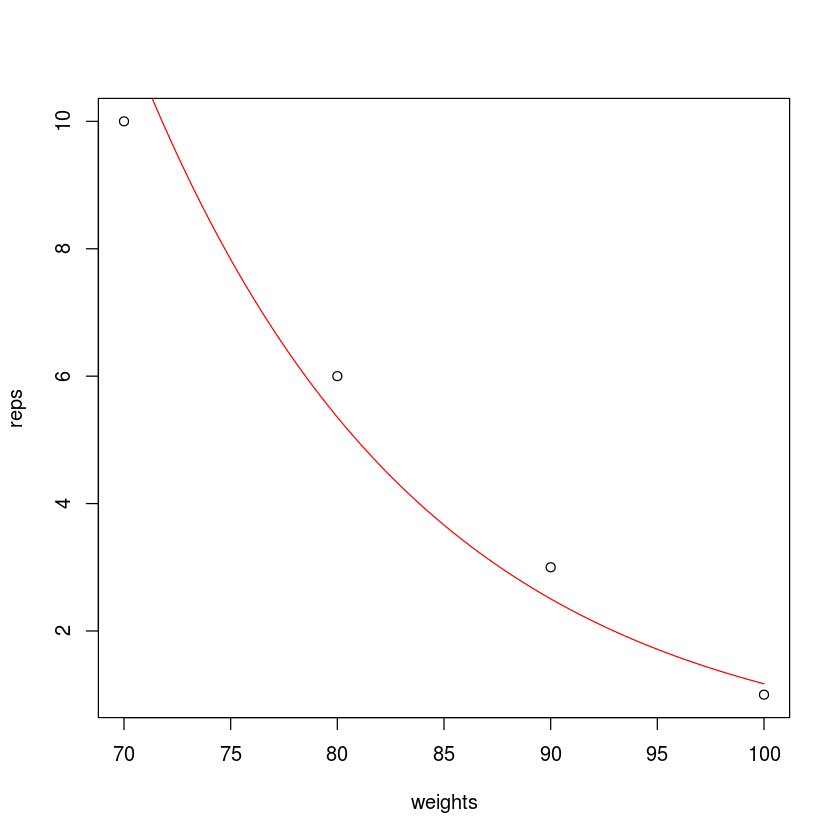

In [45]:
weightvalues <- seq(0, max(weight), 0.1)

reps.model <- exp(predict(model,list(weight=weightvalues)))

plot(weights, reps)

lines(weightvalues, reps.model,
     col="red",
     xlab="Weight (lbs)",
     ylab="Reps Completed")